In [136]:
import pandas as pd
import os
from env import get_db_url
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.preprocessing


### Acquire and Summarize

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.

In [17]:
sql = '''SELECT *
FROM properties_2017
JOIN (SELECT parcelid, MAX(transactiondate) AS max_transactiondate
        FROM predictions_2017
        GROUP BY parcelid) pred USING(parcelid)
JOIN predictions_2017 USING (parcelid)
LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
LEFT JOIN propertylandusetype USING (propertylandusetypeid)
LEFT JOIN airconditioningtype USING (airconditioningtypeid)
LEFT JOIN typeconstructiontype USING (typeconstructiontypeid)
LEFT JOIN storytype USING (storytypeid)
LEFT JOIN unique_properties USING (parcelid)
LEFT JOIN heatingorsystemtype USING (heatingorsystemtypeid)
WHERE propertylandusetype.propertylandusedesc = 'Single Family Residential'
AND predictions_2017.transactiondate LIKE '2017%%'
AND properties_2017.latitude IS NOT NULL
AND properties_2017.longitude IS NOT NULL;'''

df = pd.read_sql(sql, get_db_url('zillow'));

In [18]:
df.head()

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,max_transactiondate,id,logerror,transactiondate,architecturalstyledesc,propertylandusedesc,airconditioningdesc,typeconstructiondesc,storydesc,heatingorsystemdesc
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,2017-01-01,0,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,2017-01-01,1,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,2017-01-01,2,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,2017-01-01,3,-0.103410,2017-01-01,None,Single Family Residential,None,None,None,Central
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,2017-01-01,6,-0.001011,2017-01-01,None,Single Family Residential,Central,None,None,Central


Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [19]:
df.shape

(52441, 69)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
heatingorsystemtypeid,33935.0,3.966288e+00,2.562506e+00,1.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.400000e+01
parcelid,52441.0,1.299912e+07,3.411444e+06,1.071186e+07,1.151022e+07,1.257764e+07,1.412953e+07,1.676878e+08
storytypeid,47.0,7.000000e+00,0.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
typeconstructiontypeid,76.0,5.973684e+00,2.294157e-01,4.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
airconditioningtypeid,13638.0,2.438041e+00,3.846176e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
propertylandusetypeid,52441.0,2.610000e+02,0.000000e+00,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02,2.610000e+02
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
id,52441.0,1.497270e+06,8.594393e+05,3.490000e+02,7.579550e+05,1.500810e+06,2.241534e+06,2.982270e+06
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52441.0,2.299403e+00,1.022772e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   heatingorsystemtypeid         33935 non-null  float64
 1   parcelid                      52441 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        76 non-null     float64
 4   airconditioningtypeid         13638 non-null  float64
 5   propertylandusetypeid         52441 non-null  float64
 6   architecturalstyletypeid      70 non-null     float64
 7   id                            52441 non-null  int64  
 8   basementsqft                  47 non-null     float64
 9   bathroomcnt                   52441 non-null  float64
 10  bedroomcnt                    52441 non-null  float64
 11  buildingclasstypeid           0 non-null      object 
 12  buildingqualitytypeid         33740 non-null  float64
 13  c

In [22]:
df_num = df.select_dtypes(include='number')
df_num

,heatingorsystemtypeid,parcelid,storytypeid,typeconstructiontypeid,airconditioningtypeid,propertylandusetypeid,architecturalstyletypeid,id,basementsqft,bathroomcnt,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,id,logerror
0,NaN,14297519,NaN,NaN,NaN,261.0,NaN,1727539,NaN,3.5,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,6.059063e+13,0,0.025595
1,NaN,17052889,NaN,NaN,NaN,261.0,NaN,1387261,NaN,1.0,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,6.111001e+13,1,0.055619
2,NaN,14186244,NaN,NaN,NaN,261.0,NaN,11677,NaN,2.0,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,6.059022e+13,2,0.005383
3,2.0,12177905,NaN,NaN,NaN,261.0,NaN,2288172,NaN,3.0,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,6.037300e+13,3,-0.103410
4,2.0,12095076,NaN,NaN,1.0,261.0,NaN,781532,NaN,3.0,...,NaN,276684.0,773303.0,2016.0,496619.0,9516.26,NaN,6.037461e+13,6,-0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52436,2.0,12412492,NaN,NaN,NaN,261.0,NaN,2274245,NaN,2.0,...,NaN,125466.0,346534.0,2016.0,221068.0,4175.08,NaN,6.037555e+13,77607,0.001082
52437,2.0,11000655,NaN,NaN,NaN,261.0,NaN,673515,NaN,2.0,...,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,6.037101e+13,77609,0.020615
52438,NaN,17239384,NaN,NaN,NaN,261.0,NaN,2968375,NaN,2.0,...,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,6.111008e+13,77610,0.013209
52439,2.0,12773139,NaN,NaN,1.0,261.0,NaN,1843709,NaN,1.0,...,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,6.037434e+13,77611,0.037129


In [23]:
# # value counts for each column 
# for column in df_num.columns:
#     print(column)
#     print(df_num[column].value_counts(ascending=False))
#     print("-----------------")

Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [24]:
def find_missing_values(df):
    column_name = []
    num_rows_missing = []
    pct_rows_missing = []

    for column in df.columns:       
        num_rows_missing.append(df[column].isna().sum())
        pct_rows_missing.append(df[column].isna().sum()/ len(df))
        column_name.append(column)
    data = {'column_name':column_name, 'num_rows_missing': num_rows_missing, 'pct_rows_missing': pct_rows_missing}
    return pd.DataFrame(data, index=None)


In [25]:
# call function and show dataframe
missing_values = find_missing_values(df)
missing_values.head()

,column_name,num_rows_missing,pct_rows_missing
0,heatingorsystemtypeid,18506,0.352892
1,parcelid,0,0.0
2,storytypeid,52394,0.999104
3,typeconstructiontypeid,52365,0.998551
4,airconditioningtypeid,38803,0.739936


In [26]:
# set index to column name so that erroneous value is not assigned to index
missing_values.set_index('column_name', inplace=True)

In [27]:
missing_values.head()

,num_rows_missing,pct_rows_missing
column_name,,
heatingorsystemtypeid,18506,0.352892
parcelid,0,0.0
storytypeid,52394,0.999104
typeconstructiontypeid,52365,0.998551
airconditioningtypeid,38803,0.739936


### Prepare

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

Completed during SQL query "Single Family Residential"

In [28]:
df.propertylandusedesc.value_counts()

Single Family Residential    52441
Name: propertylandusedesc, dtype: int64

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

The input:
A dataframe
A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
The output:
The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
hint:
Look up the dropna documentation.
You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.

In [40]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [41]:
df = handle_missing_values(df, prop_required_column = .7, prop_required_row = .7)

In [42]:
df.shape

(52433, 31)

In [65]:
df.isna().sum()

parcelid                           0
propertylandusetypeid              0
id                                 0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                129
calculatedfinishedsquarefeet      74
finishedsquarefeet12             239
fips                               0
fullbathcnt                      129
latitude                           0
longitude                          0
lotsizesquarefeet                363
propertycountylandusecode          0
rawcensustractandblock             0
regionidcity                    1033
regionidcounty                     0
regionidzip                       23
roomcnt                            0
yearbuilt                        108
structuretaxvaluedollarcnt        81
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              115
max_transactiondate                0
i

In [150]:
def handle_outliers(df, cols, k):
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}

    # get a list of all columns that are not object type
    non_object_cols = df.dtypes[df.dtypes != 'object'].index


    for col in non_object_cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in non_object_cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
    
    return df

In [158]:
df = handle_outliers(df,cols = ['columns'],k =1.5)

ValueError: cannot reindex from a duplicate axis

In [164]:
bounds_dict = {}
k = 1.5
    # get a list of all columns that are not object type
non_object_cols = df.dtypes[df.dtypes != 'object'].index
for col in non_object_cols:
    # get necessary iqr values
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound =  q3 + k * iqr
    lower_bound =  q1 - k * iqr
    #store values in a dictionary referencable by the column name
    #and specific bound
    bounds_dict[col] = {}
    bounds_dict[col]['upper_bound'] = upper_bound
    bounds_dict[col]['lower_bound'] = lower_bound

for col in non_object_cols:
    #retrieve bounds
    col_upper_bound = bounds_dict[col]['upper_bound']
    col_lower_bound = bounds_dict[col]['lower_bound']
    

### Mall Customers

- Acquire data from the customers table in the mall_customers database.
- Summarize the data (include distributions and descriptive statistics).
- Detect outliers using IQR.
- Split data into train, validate, and test.
- Encode categorical columns using a one hot encoder (pd.get_dummies).
- Handles missing values.
- Scaling

### Acquire data from mall_customers database

In [89]:
sql = '''SELECT * FROM customers;'''
mall = pd.read_sql(sql, get_db_url('mall_customers'));

In [90]:
mall.set_index(['customer_id'], inplace=True)

### Summarize the data

In [91]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [92]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [93]:
mall.describe().T

,count,mean,std,min,25%,50%,75%,max
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'spending_score'}>, <AxesSubplot:>]],
      dtype=object)

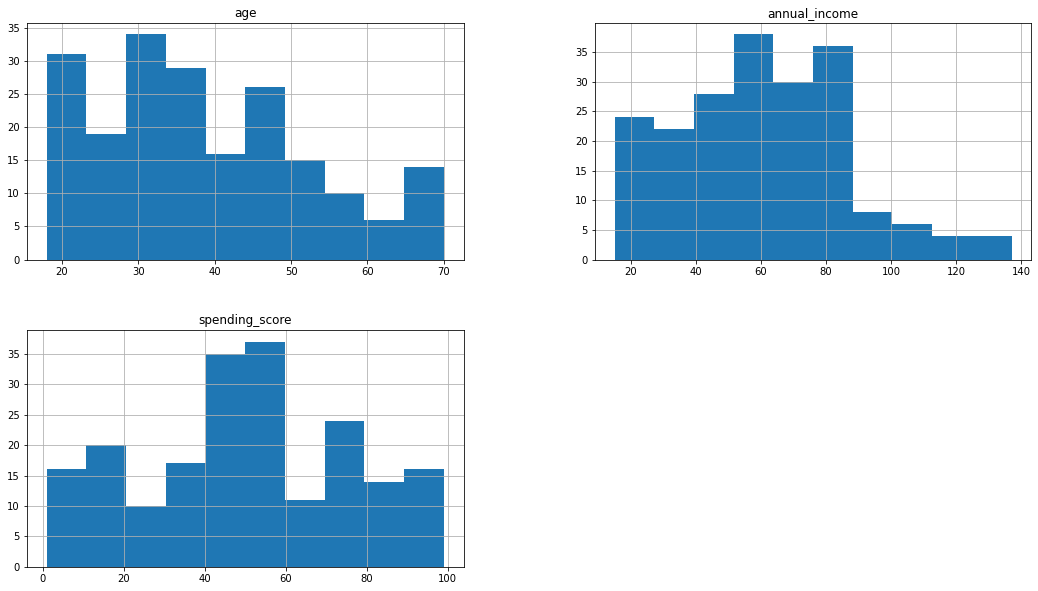

In [94]:
mall.hist(figsize=(18,10),bins=10)

### Detect outliers

<AxesSubplot:ylabel='age'>

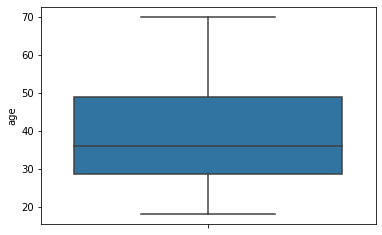

In [95]:
sns.boxplot(y=mall.age)

<AxesSubplot:ylabel='annual_income'>

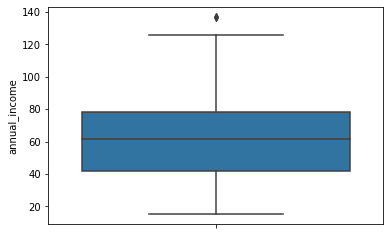

In [96]:
# annual income shows outliers
sns.boxplot(y=mall.annual_income)

<AxesSubplot:ylabel='spending_score'>

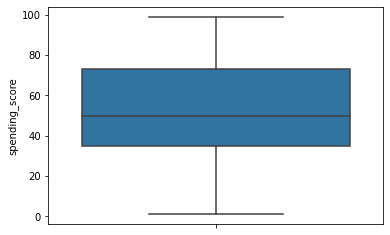

In [97]:
sns.boxplot(y=mall.spending_score)

In [105]:
q1 = mall.annual_income.quantile(0.25)
q3 = mall.annual_income.quantile(0.75)
iqr = q3 - q1
upper_bound =  q3 + 1.5 * iqr


In [109]:
# there are 2 outliers at 137k for annual income
mall[mall.annual_income > upper_bound]

,gender,age,annual_income,spending_score
customer_id,,,,
199,Male,32,137,18
200,Male,30,137,83


### Split the data

In [119]:
def split_mall_data(df):
    ''' This function splits the cleaned dataframe into train, validate, and test 
    datasets.'''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123) 
                                   
    return train, validate, test

In [120]:
train, validate, test = split_mall_data(mall)

### Encode the data

In [125]:
dummy_df = pd.get_dummies(mall[['gender']],dummy_na=False, drop_first=True)

In [126]:
mall = pd.concat([mall, dummy_df], axis=1)

In [128]:
mall = mall.drop(columns='gender')

In [129]:
mall.head()

,age,annual_income,spending_score,gender_Male
customer_id,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0


### Handle missing values

In [130]:
# no missing values to handle
mall.isna().sum()

age               0
annual_income     0
spending_score    0
gender_Male       0
dtype: int64

### Scale the data

In [137]:
def scale_data(train,
              validate,
              test,
              columns_to_scale=['age','annual_income', 'spending_score']):
    '''
    Scales the split data.
    Takes in train, validate and test data and returns the scaled data.
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    #using MinMaxScaler (best showing distribution once scaled)
    scaler = sklearn.preprocessing.MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    #creating a df that puts MinMaxScaler to work on the wanted columns and returns the split datasets and counterparts
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                 columns=train[columns_to_scale].columns.values).set_index([train.index.values])
    
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                 columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    
    return train_scaled, validate_scaled, test_scaled

In [138]:
train_scaled, validate_scaled, test_scaled = scale_data(train,test,validate)

In [139]:
train_scaled.head()

,gender,age,annual_income,spending_score
customer_id,,,,
124,Male,0.403846,0.442623,0.957447
77,Female,0.519231,0.319672,0.553191
172,Male,0.192308,0.590164,0.787234
11,Male,0.942308,0.032787,0.138298
36,Female,0.057692,0.147541,0.851064


# To Do: wrangle_zillow.py and wrangle_mall.py